In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("CO2_emission.csv")
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [25]:
# We are drop this columns because this columns is useless for our model
df.drop(["Model_Year", "Make", "Model", "Transmission", "Vehicle_Class"], axis= 1, inplace= True)

In [26]:
df.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,9.9,7.0,8.6,199,3
1,3.5,6,11.1,10.8,11.0,256,3
2,2.0,4,11.0,8.6,9.9,232,6
3,2.0,4,11.3,9.1,10.3,242,6
4,2.0,4,11.2,8.0,9.8,230,7


In [27]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Engine_Size                             935 non-null    float64
 1   Cylinders                               935 non-null    int64  
 2   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 3   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 4   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 5   CO2_Emissions                           935 non-null    int64  
 6   Smog_Level                              935 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 51.3 KB


In [29]:
df.isna().sum()

Engine_Size                               0
Cylinders                                 0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

<Axes: xlabel='Fuel_Consumption_in_City(L/100 km)', ylabel='Fuel_Consumption_comb(L/100km)'>

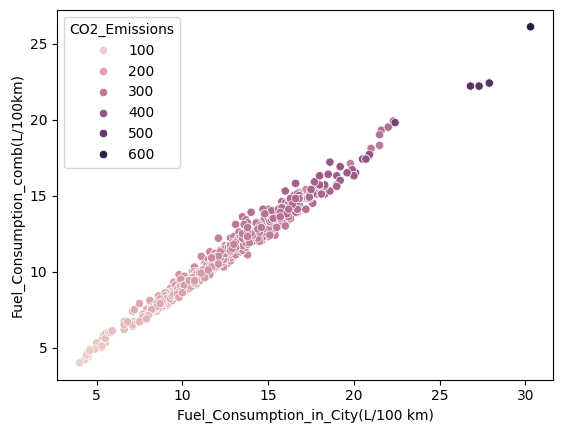

In [30]:
sns.scatterplot(x = "Fuel_Consumption_in_City(L/100 km)", y= "Fuel_Consumption_comb(L/100km)", hue="CO2_Emissions", data=df)

<Axes: xlabel='Engine_Size', ylabel='Fuel_Consumption_in_City_Hwy(L/100 km)'>

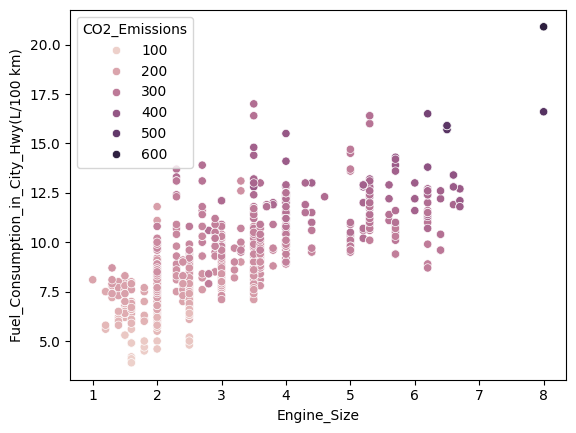

In [31]:
sns.scatterplot(x= "Engine_Size", y = "Fuel_Consumption_in_City_Hwy(L/100 km)", hue="CO2_Emissions", data=df)

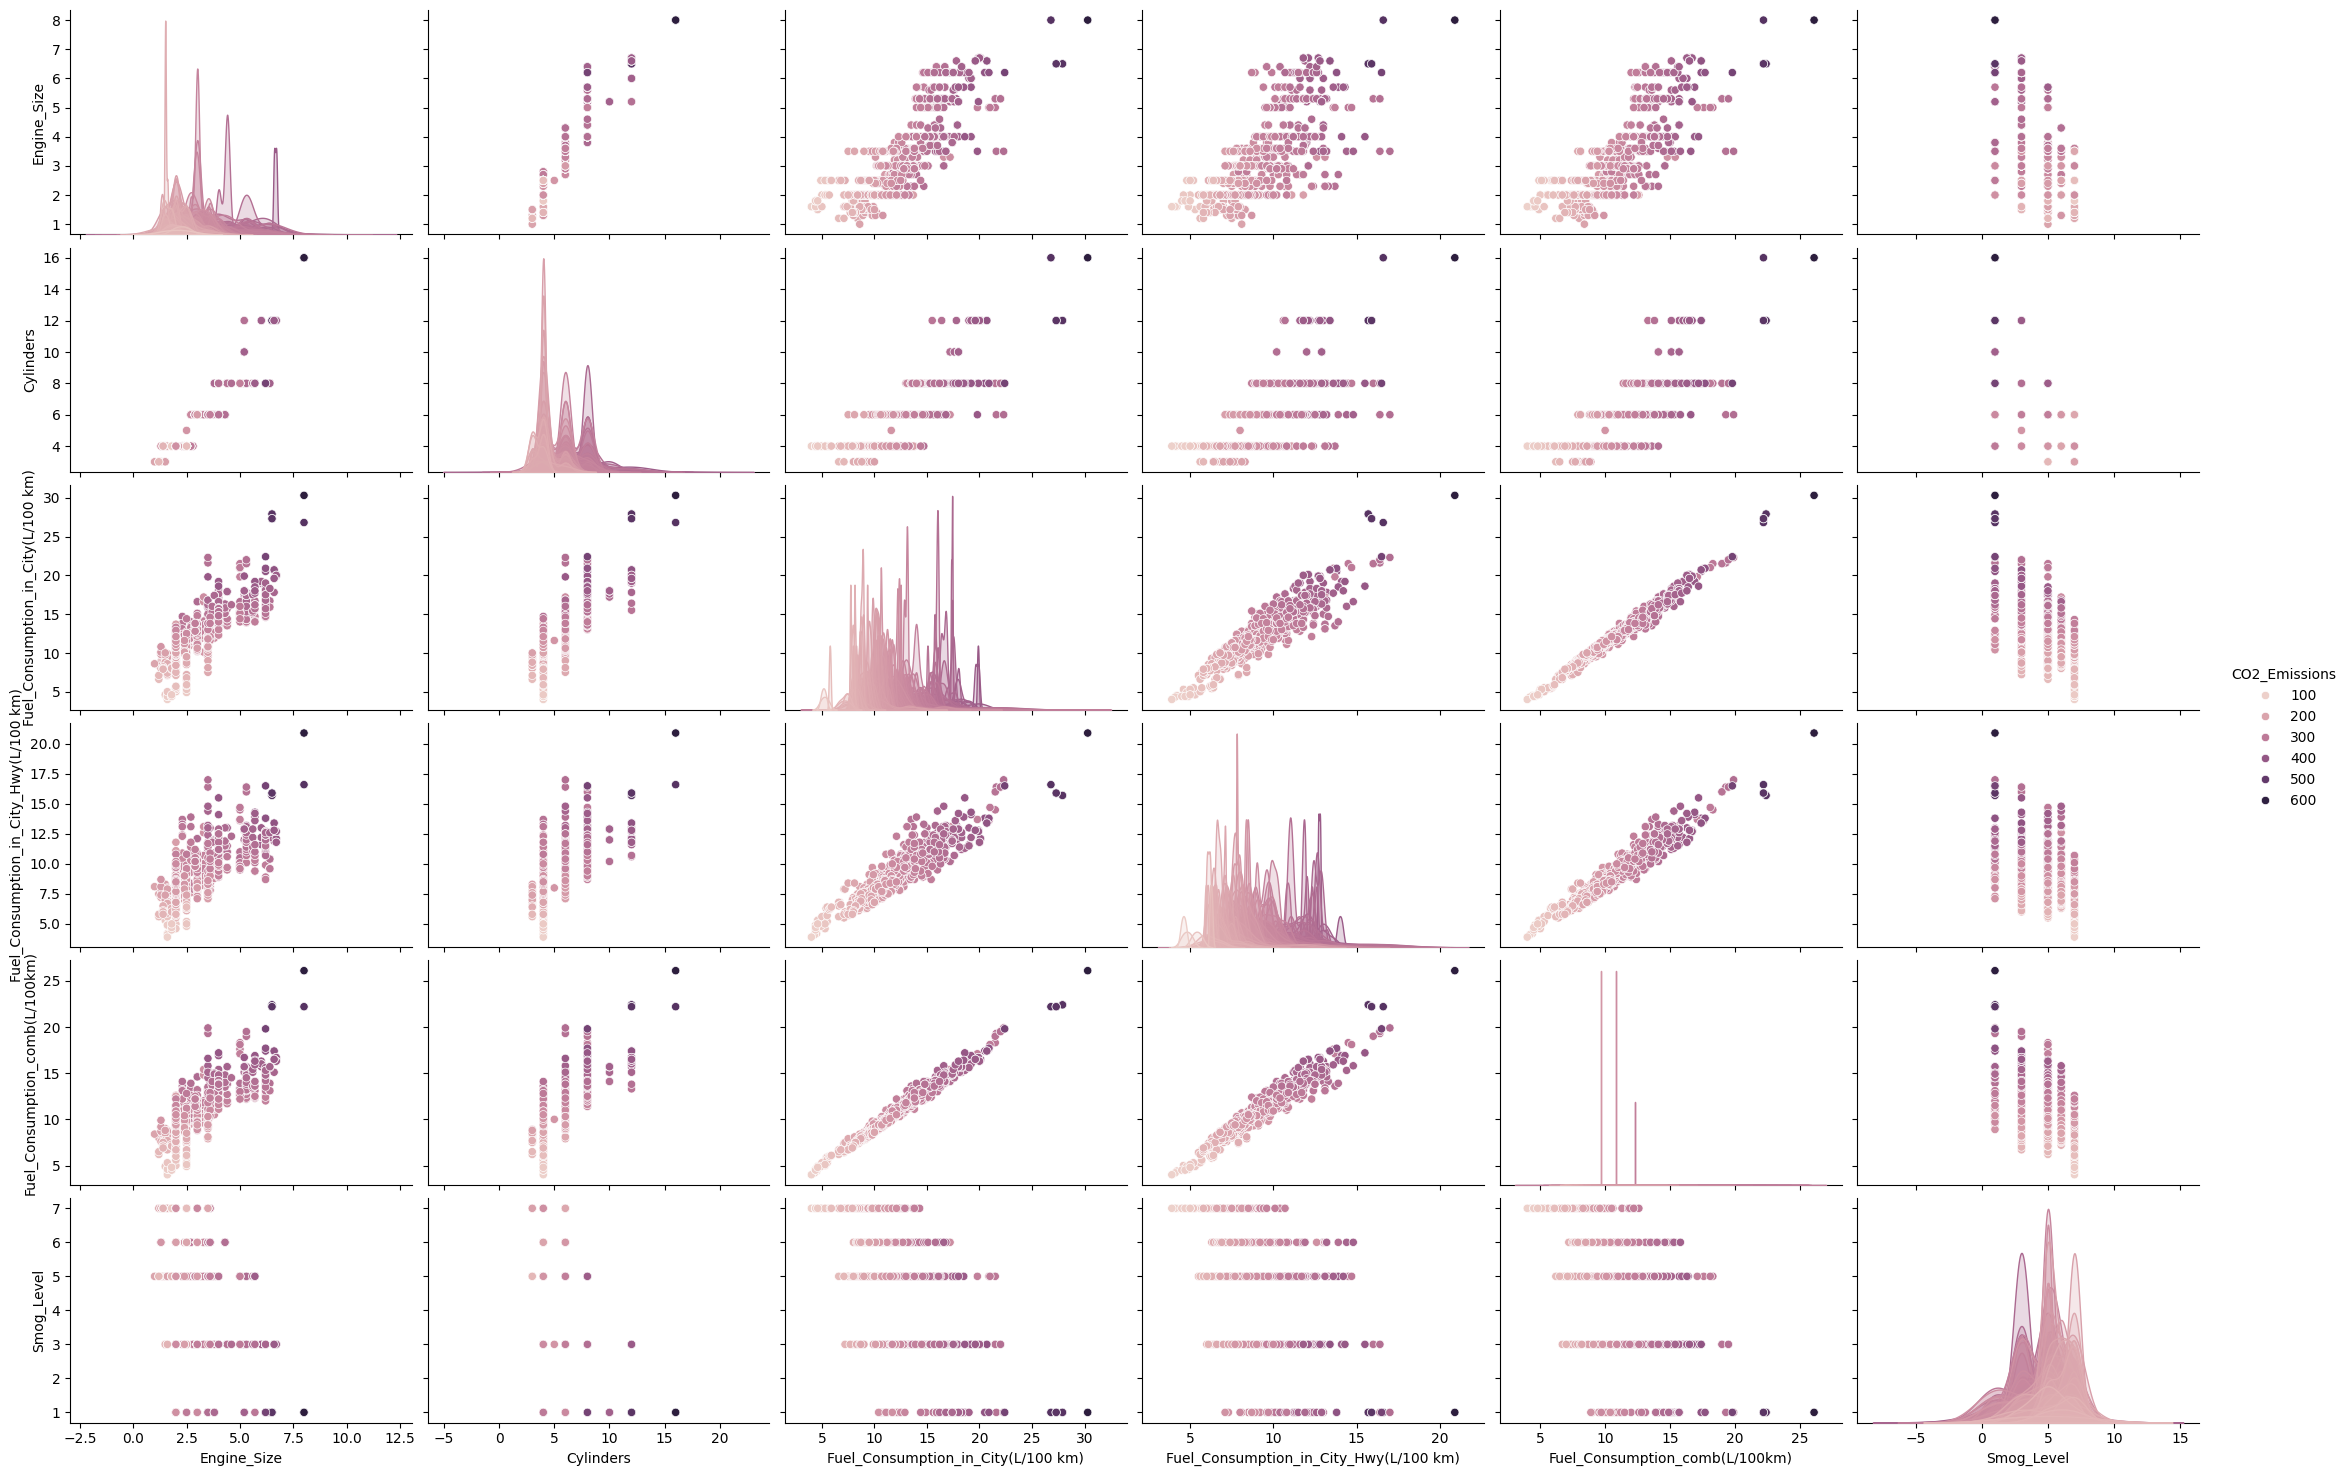

In [32]:
sns.pairplot(hue="CO2_Emissions", height=2.5, aspect=1.50, data=df)


In [33]:
df.corr(numeric_only= True)

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Engine_Size,1.000000,0.918483,0.833345,0.748928,0.817541,0.825725,-0.504544
Cylinders,0.918483,1.000000,0.842551,0.742968,0.821770,0.834972,-0.532742
Fuel_Consumption_in_City(L/100 km),0.833345,0.842551,1.000000,0.926625,0.991267,0.966137,-0.573210
Fuel_Consumption_in_City_Hwy(L/100 km),0.748928,0.742968,0.926625,1.000000,0.967835,0.933468,-0.490750
Fuel_Consumption_comb(L/100km),0.817541,0.821770,0.991267,0.967835,1.000000,0.971241,-0.555426
CO2_Emissions,0.825725,0.834972,0.966137,0.933468,0.971241,1.000000,-0.583690
Smog_Level,-0.504544,-0.532742,-0.573210,-0.490750,-0.555426,-0.583690,1.000000


<Axes: >

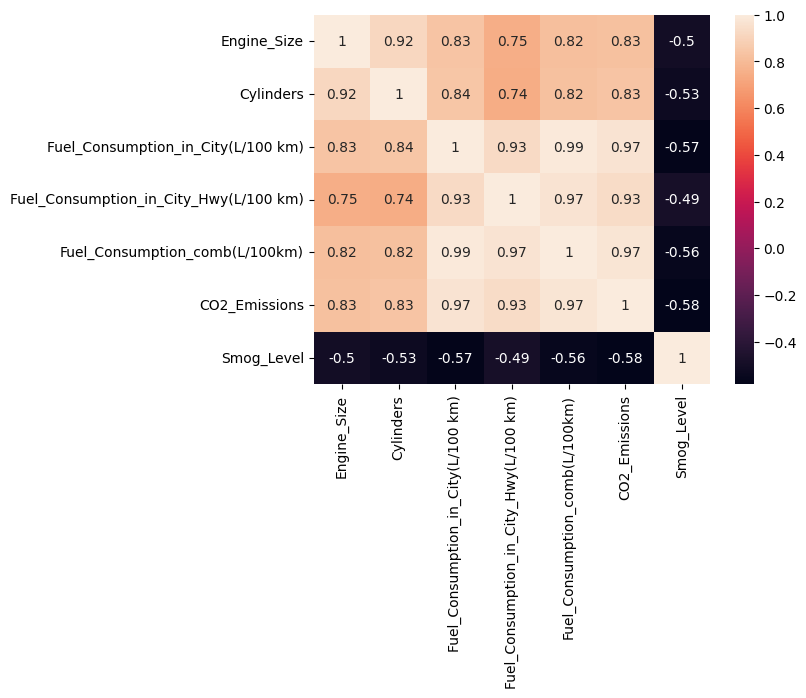

In [34]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

In [35]:
X = df.drop("CO2_Emissions", axis=1)
y = df["CO2_Emissions"]

### **Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

### **Lineer Regression**

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
test_model = LinearRegression()
test_model.fit(X_train, y_train)

LinearRegression()

In [40]:
test_pred = test_model.predict(X_test)

##### **Metrics**

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
print(round(mean_absolute_error(test_pred, y_test),2))
print(round(np.sqrt(mean_squared_error(test_pred, y_test)),2))
print(round(r2_score(test_pred, y_test),2))

7.27
16.15
0.94


### **Final Model**

In [43]:
fin_lin_model = LinearRegression()
fin_lin_model.fit(X, y)

LinearRegression()

In [44]:
fin_lin_pred = fin_lin_model.predict(X)

In [45]:
print(round(mean_absolute_error(fin_lin_pred, y),2))
print(round(np.sqrt(mean_squared_error(fin_lin_pred, y)),2))
print(round(r2_score(fin_lin_pred, y),2))

6.97
14.47
0.95


### **Poly Regression**

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_conv = PolynomialFeatures(degree=2)
X_poly = poly_conv.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=9)

In [49]:
poly_test_model = LinearRegression(fit_intercept= True)
poly_test_model.fit(X_train, y_train)

LinearRegression()

In [50]:
poly_test_pred = poly_test_model.predict(X_test)

In [51]:
print(round(mean_absolute_error(poly_test_pred, y_test),2))
print(round(np.sqrt(mean_squared_error(poly_test_pred, y_test)),2))
print(round(r2_score(poly_test_pred, y_test),2))

7.32
13.96
0.95


### **Best Degree**

In [52]:
for i in range(1, 6):
    poly_conv = PolynomialFeatures(degree=i)
    X_poly = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=9)
    poly_test_model = LinearRegression(fit_intercept= True)
    poly_test_model.fit(X_train, y_train)

    poly_test_pred = poly_test_model.predict(X_test)

    print(f"Degree: {i} ")
    print(round(mean_absolute_error(poly_test_pred, y_test),2))
    print(round(np.sqrt(mean_squared_error(poly_test_pred, y_test)),2))
    print(round(r2_score(poly_test_pred, y_test),2))

Degree: 1 
7.27
16.15
0.94
Degree: 2 
7.32
13.96
0.95
Degree: 3 
6.34
12.8
0.96
Degree: 4 
11.56
47.61
0.61
Degree: 5 
55866.93
812641.13
-0.0


### **Best Polynomial Regression (Best Model)**

In [53]:
poly_conv_fin = PolynomialFeatures(degree=3, include_bias= False)
X_poly = poly_conv_fin.fit_transform(X)

In [54]:
best_model = LinearRegression(fit_intercept= True)
best_model.fit(X_poly, y) 

LinearRegression()

In [55]:
best_pred = best_model.predict(X_poly)

In [56]:
print(round(mean_absolute_error(best_pred, y),2))
print(round(np.sqrt(mean_squared_error(best_pred, y)),2))
print(round(r2_score(best_pred, y),2))

4.47
7.46
0.99


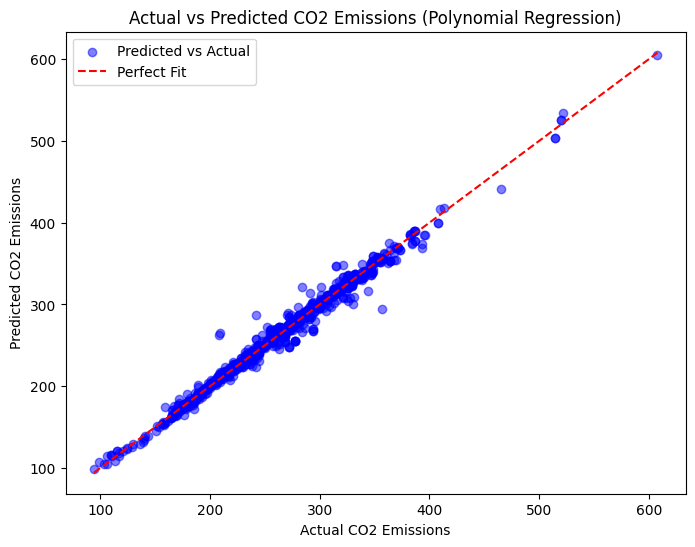

In [57]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, best_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Polynomial Regression)")
plt.legend()
plt.show()


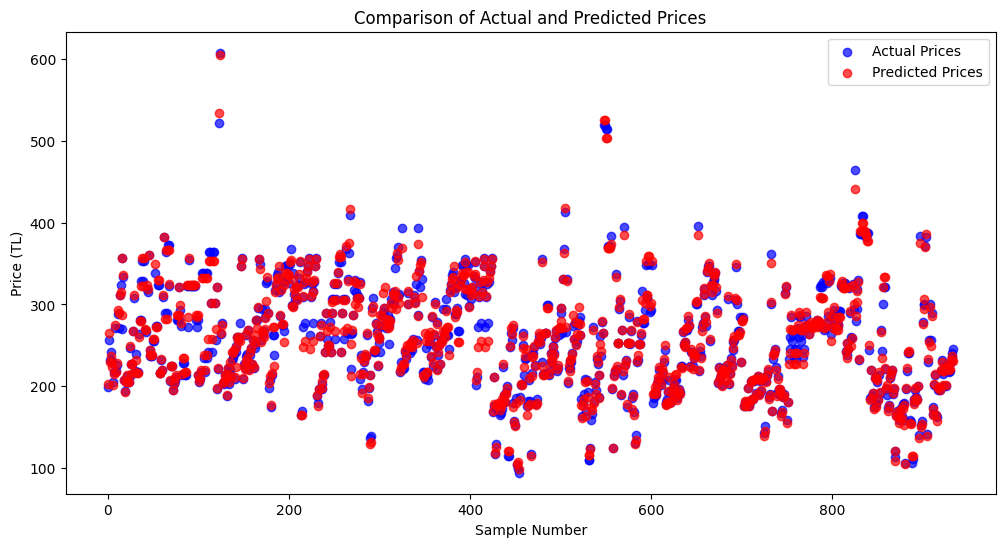

In [58]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
# Actual values in blue
plt.scatter(range(len(y)), y, color='blue', alpha=0.7, label='Actual Prices')
# Predicted values in red
plt.scatter(range(len(y)), best_pred, color='red', alpha=0.7, label='Predicted Prices')

plt.xlabel("Sample Number")
plt.ylabel("Price (TL)")
plt.title("Comparison of Actual and Predicted Prices")
plt.legend()
plt.show()


### **Generalization Testing**

In [ ]:
max_co2_index = df["CO2_Emissions"].idxmax()  
max_co2_car = df.loc[max_co2_index]   

print(max_co2_car)

Engine_Size                                 8.0
Cylinders                                  16.0
Fuel_Consumption_in_City(L/100 km)         30.3
Fuel_Consumption_in_City_Hwy(L/100 km)     20.9
Fuel_Consumption_comb(L/100km)             26.1
CO2_Emissions                             608.0
Smog_Level                                  1.0
Name: 124, dtype: float64


In [ ]:
car_1 = np.array([[8, 16, 30.3, 20.9, 26.1, 1]])  
poly_car_1 = poly_conv_fin.transform(car_1) 

car_1_pred = best_model.predict(poly_car_1)  
print(f"Predicted CO2 Emission: {car_1_pred[0]}")

Tahmini CO2 Emisyonu: 604.7083065048082


C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [69]:
df.iloc[105:108]

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
105,3.0,6,16.6,12.1,14.6,339,3
106,3.0,6,11.3,8.7,10.1,235,5
107,2.0,4,10.2,8.2,9.3,217,7


In [79]:
car_2 = np.array([[3, 6, 16.6, 12.1, 14.6, 3]])  
poly_car_2 = poly_conv_fin.transform(car_2) 

car_2_pred = best_model.predict(poly_car_2)  
print(f"Predicted CO2 Emission: {car_2_pred[0]}")

Predicted CO2 Emission: 332.35920433308235


C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
